
<p style="background-color:purple; font-family: newtimeroman; font-size: 250%; color: #FFF9ED; border-radius: 80px 20px; padding: 25px; text-align: center;"> <b> Clustering (Customer Segmentation) Unsupervised Project</b>
<img src="R.png" style="width: 150px; vertical-align: left; margin-left: 20px; float:right;" >
<span style="display: inline-block; width: calc(80% - 20px); text-align: center;"></span> 
​
</p>

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

## Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from skimpy import clean_columns

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

You can rename columns to more usable, if you need.

In [68]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
df.Gender.value_counts() 

Gender
Female    112
Male       88
Name: count, dtype: int64

In [70]:
df.Gender.value_counts() 

Gender
Female    112
Male       88
Name: count, dtype: int64

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.000,100.500,57.879,1.000,50.750,100.500,150.250,200.000
Age,200.000,38.850,13.969,18.000,28.750,36.000,49.000,70.000
Annual Income (k$),200.000,60.560,26.265,15.000,41.500,61.500,78.000,137.000
Spending Score (1-100),200.000,50.200,25.824,1.000,34.750,50.000,73.000,99.000


In [72]:
for column in df.columns:
    unique_values = df[column].unique()
    unique_count = len(unique_values)
   
    print(f"\033[1m\033[91mColumn:\033[0m \033[1m\033[94m{column}\033[0m")
    print(f"\033[1m\033[92mNumber of Unique Values:\033[93m {unique_count}")
    
    if unique_count <= 10:
        print(f"\033[1mUnique Values:\033[0m {unique_values}\n")
    else:
        print(f"\033[95mFirst 10 Unique Values:\033[0m {unique_values[:10]}")
        print(f"... and {unique_count - 10} more unique values\n")

Column: CustomerID
Number of Unique Values: 200
First 10 Unique Values: [ 1  2  3  4  5  6  7  8  9 10]
... and 190 more unique values

Column: Gender
Number of Unique Values: 2
Unique Values: ['Male' 'Female']

Column: Age
Number of Unique Values: 51
First 10 Unique Values: [19 21 20 23 31 22 35 64 30 67]
... and 41 more unique values

Column: Annual Income (k$)
Number of Unique Values: 64
First 10 Unique Values: [15 16 17 18 19 20 21 23 24 25]
... and 54 more unique values

Column: Spending Score (1-100)
Number of Unique Values: 84
First 10 Unique Values: [39 81  6 77 40 76 94  3 72 14]
... and 74 more unique values



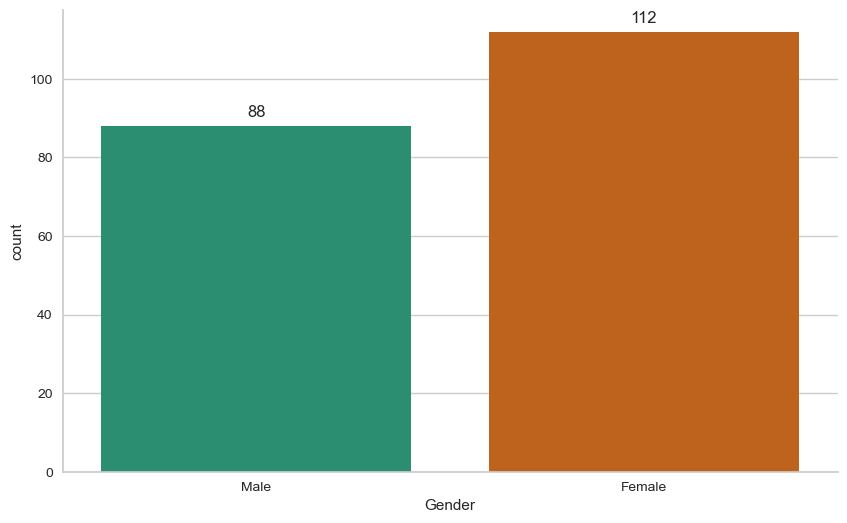

In [73]:
ax = sns.countplot(x=df["Gender"], palette='Dark2')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

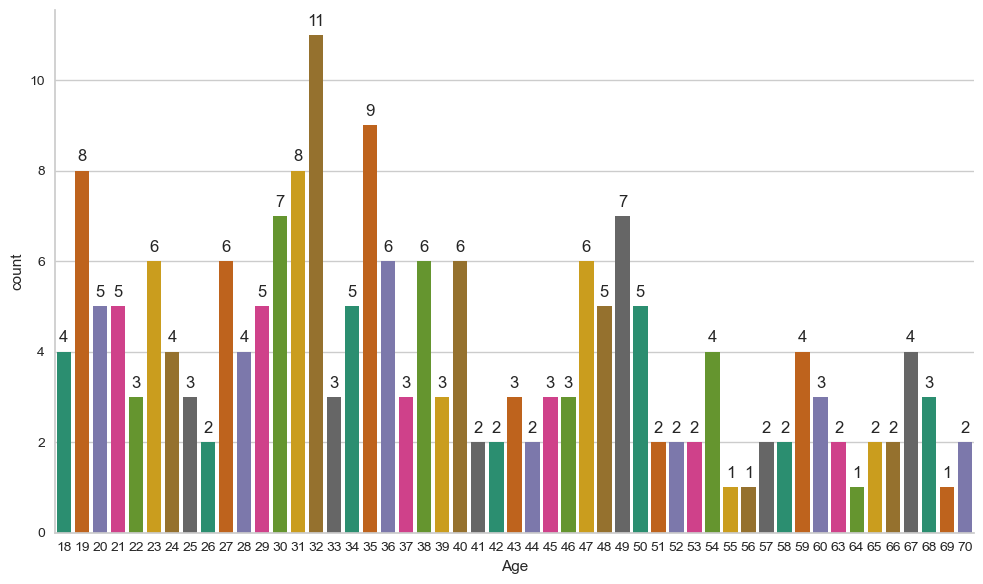

In [74]:
ax = sns.countplot(x=df["Age"], palette='Dark2')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.tight_layout()
plt.show()

### Encoding

In [75]:
class_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(class_mapping)

In [76]:
df.Gender.value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [78]:
df = clean_columns(df)

In [79]:
df.rename(columns={'annual_income_k_$': 'annual_income'}, inplace=True)
df.rename(columns={'spending_score_1_100': 'spending_score'}, inplace=True)

## Data Visualization

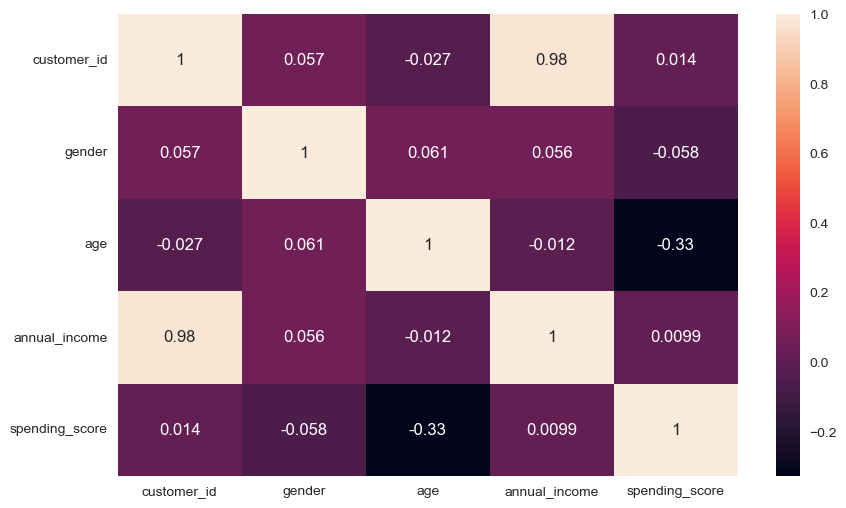

In [80]:
sns.heatmap(data=df.corr(), annot=True);

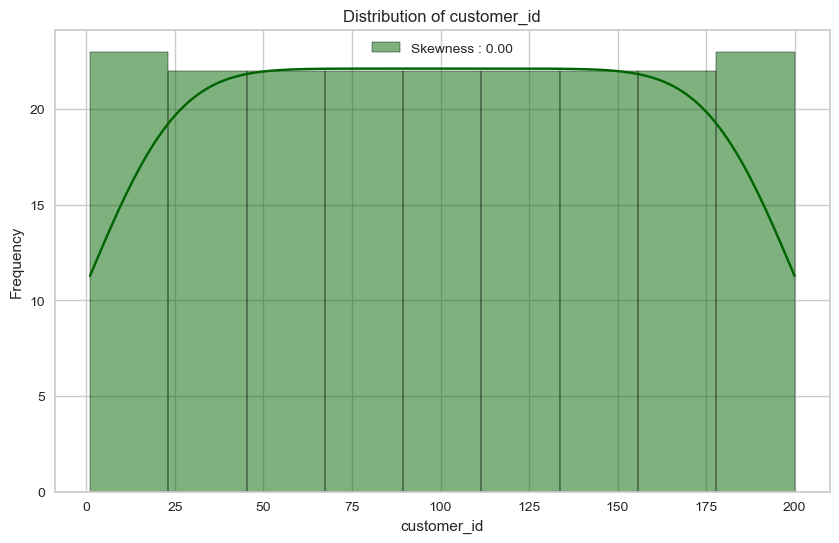

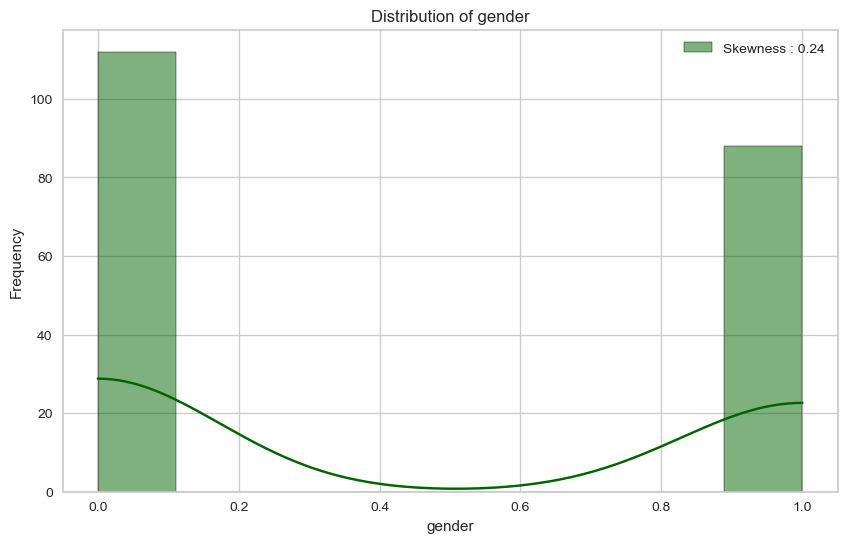

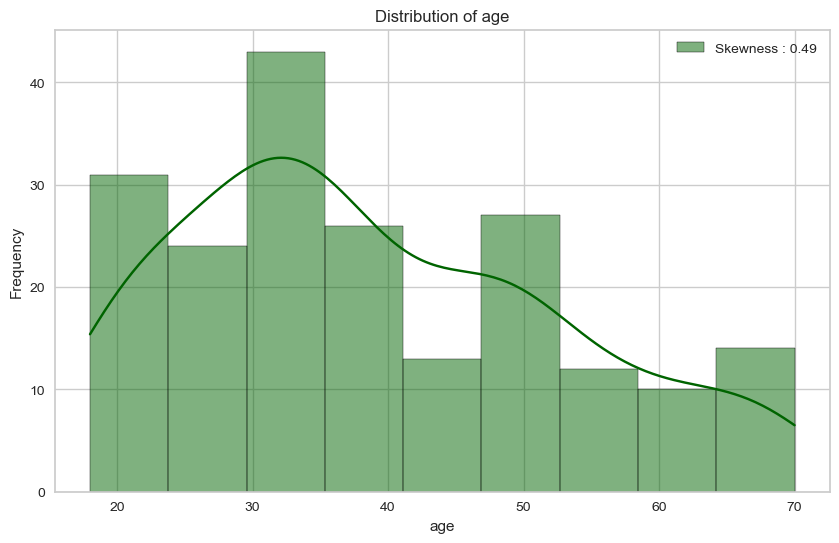

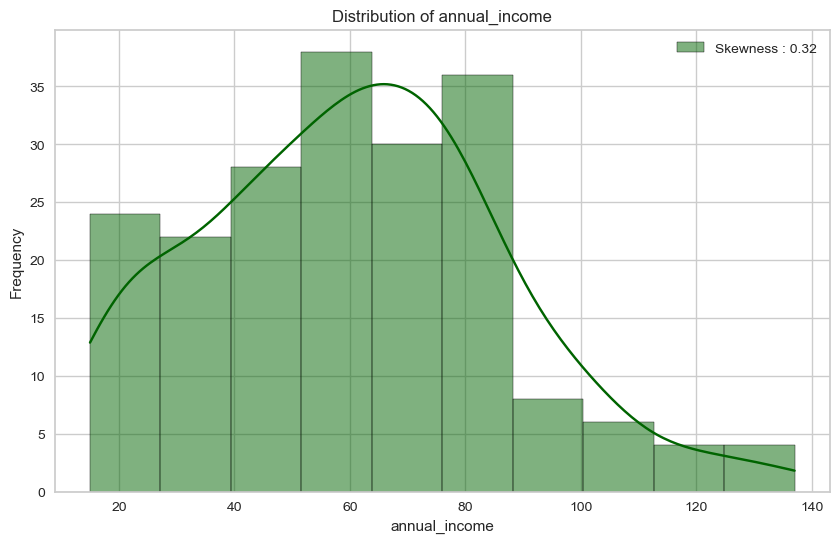

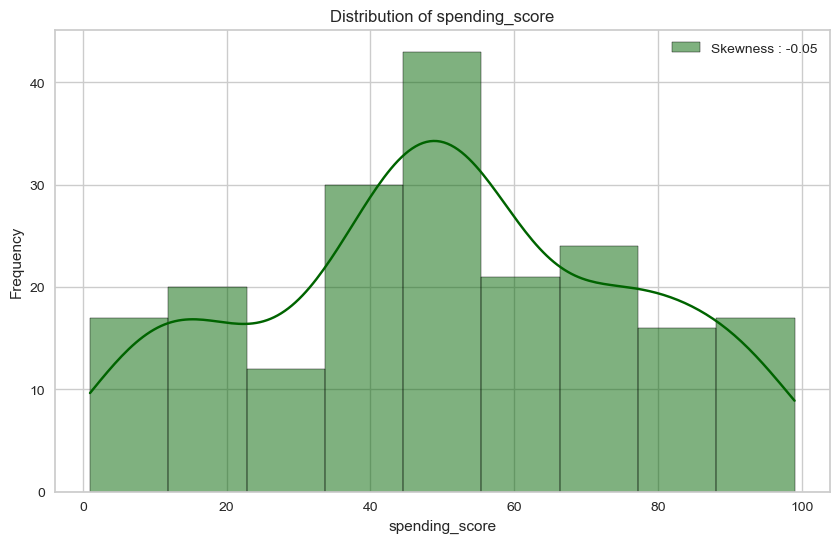

In [81]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    g = sns.histplot(df[col], color="darkgreen", kde=True, label=f"Skewness : {df[col].skew():.2f}")
    plt.legend(loc="best")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

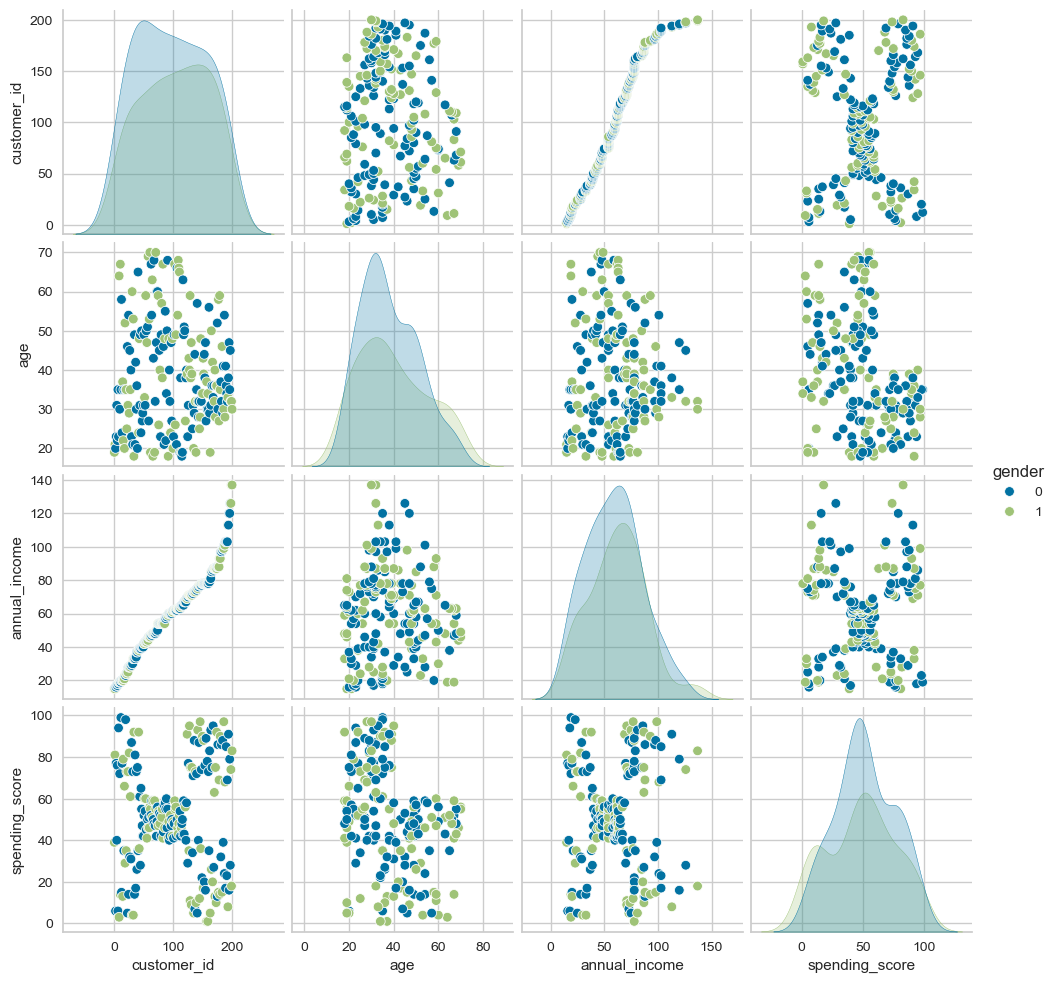

In [82]:
sns.pairplot(data=df, hue="gender")
plt.show()

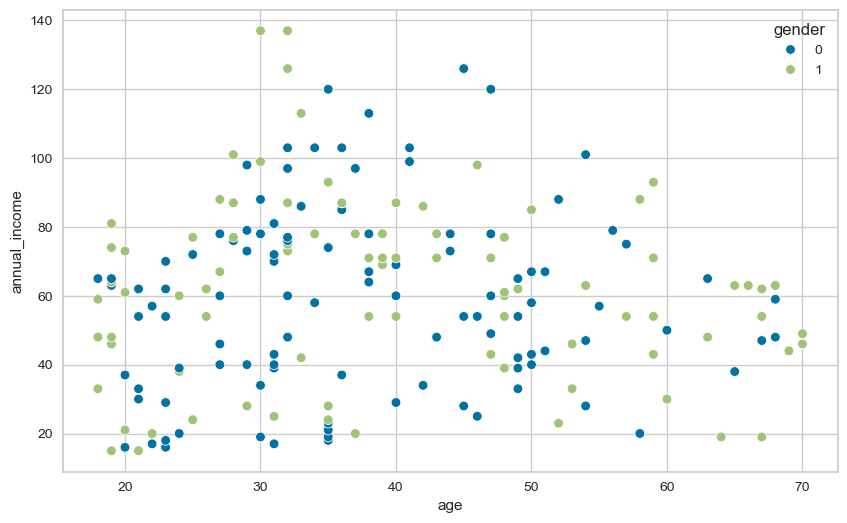

In [83]:
sns.scatterplot(x= df['age'], y= df['annual_income'], hue='gender', data=df);

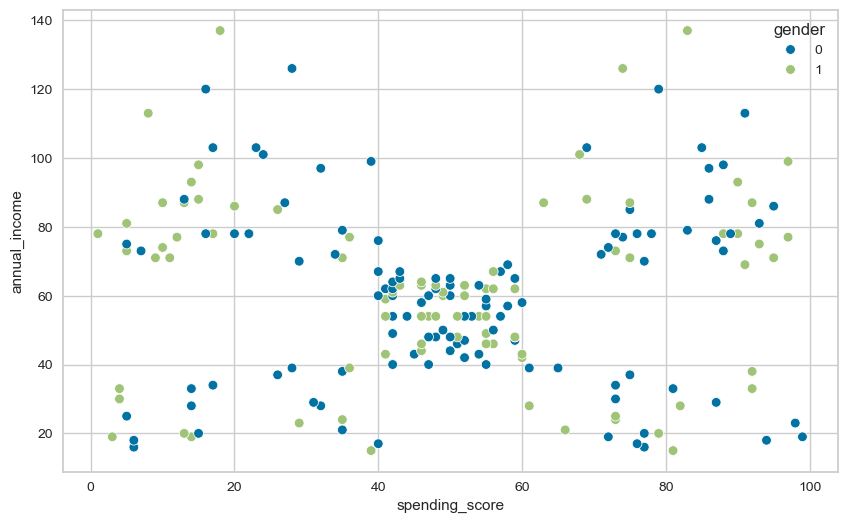

In [84]:
sns.scatterplot(x= df['spending_score'], y= df['annual_income'], hue='gender', data=df);

In [85]:
import plotly.express as px

def create_pie_chart_of_count(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    fig = px.pie(df_not_null.groupby([column_name]).size().reset_index(name='count'), names=column_name, values='count')
    fig.show()

create_pie_chart_of_count(df, 'gender')

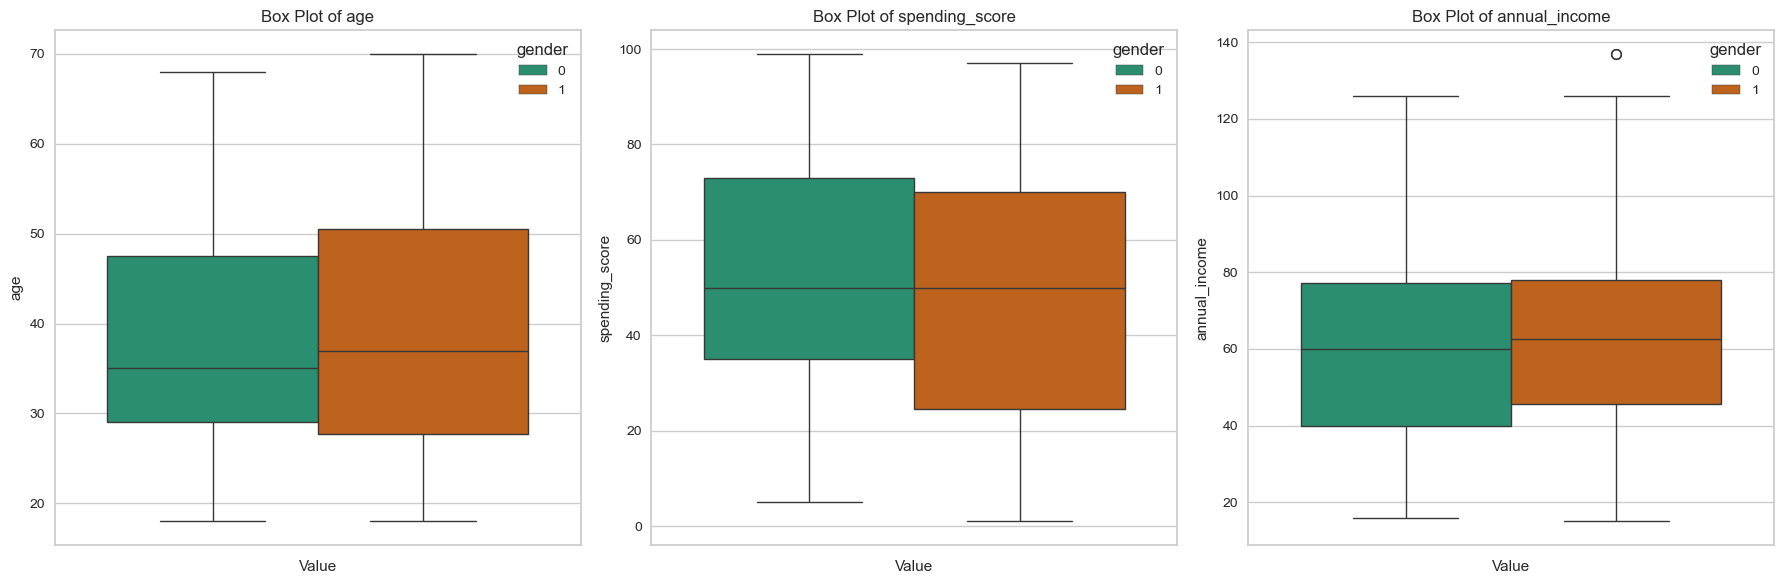

In [86]:
specific_columns = ["age", "spending_score", "annual_income"]

plt.figure(figsize=(18, 6))

for i, col in enumerate(specific_columns, 1):
    plt.subplot(1, len(specific_columns), i)
    sns.boxplot(y=col, data=df, hue="gender",palette ="Dark2")
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

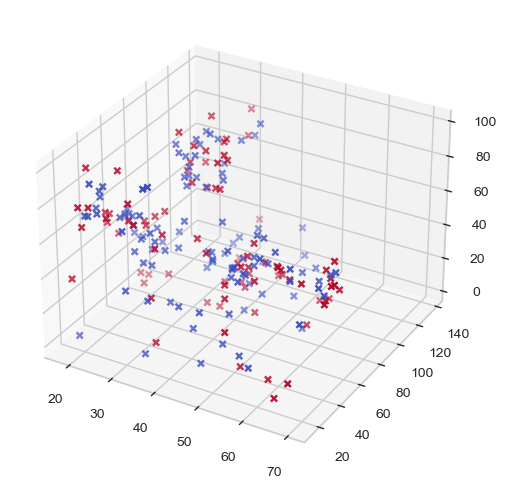

In [87]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Düzeltme: sütun isimleri ve renkler
ax.scatter(df['age'], 
           df['annual_income'], 
           df['spending_score'], 
           c=df['gender'], cmap='coolwarm', marker='x')  

plt.show()

In [88]:
import plotly.express as px

fig = px.scatter_3d(x=df['age'], y=df['annual_income'], 
                    z=df['spending_score'], color=df["gender"])
fig.show()

### Scale

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["age"] = scaler.fit_transform(df[["age"]])
df["annual_income"] = scaler.fit_transform(df[["annual_income"]])
df["spending_score"] = scaler.fit_transform(df[["spending_score"]])

In [90]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,1,-1.425,-1.739,-0.435
1,2,1,-1.281,-1.739,1.196
2,3,0,-1.353,-1.701,-1.716
3,4,0,-1.138,-1.701,1.040
4,5,0,-0.563,-1.663,-0.396


In [91]:
df.drop(columns='customer_id', axis=1, inplace=True)

In [92]:
X = df.copy()

In [93]:
df.to_csv("clean.csv", index = False)

# K-means Clustering

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [94]:
X = pd.read_csv("clean.csv")

In [95]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=5, random_state=61)

In [96]:
K_means_model.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 0, 4, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Hopkins Test 

In [97]:
from sklearn.neighbors import BallTree  # BallTree, veri noktaları arasındaki uzaklık sorgularını hızlı bir şekilde gerçekleştirmek için kullanılan bir veri yapısıdır. 
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

hopkins(df, df.shape[0])

0.29857959598665235

In [98]:
hopkins(X, 60) # 60 adet gözlem için baktım skorlar yakın. Her çalışmada değişir ama çok büyük fark çıkmaz

0.2937925047380947

## Elbow Method

In [99]:
ssd = []    # inertia  .. SSD, "Sum of Squared Distances" (mesafelerin karelerinin toplamı)

K = range(2,10)   # minimum 2 küme ile başladık

for k in K:                                          # Her bir farklı küme sayısı için K-Means modelini oluşturur ve eğitir.
    model = KMeans(n_clusters =k, random_state=61)
    model.fit(X)
    ssd.append(model.inertia_)

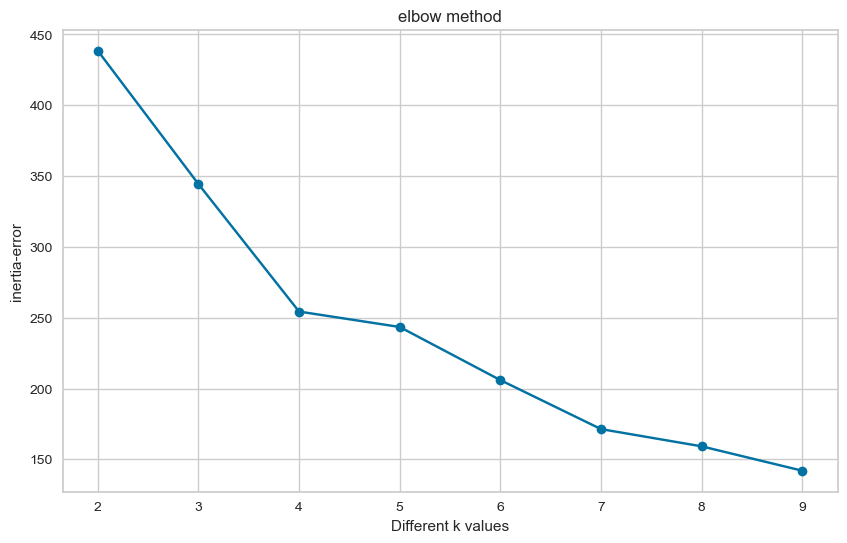

In [100]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [101]:
ssd

[438.5224115567775,
 344.405428869535,
 254.36171423484495,
 243.4733847858299,
 205.9709534718233,
 171.37266048943806,
 159.20752979424304,
 141.98944569388746]

In [102]:
pd.Series(ssd).diff()

0       NaN
1   -94.117
2   -90.044
3   -10.888
4   -37.502
5   -34.598
6   -12.165
7   -17.218
dtype: float64

In [103]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,94.117
3,90.044
4,10.888
5,37.502
6,34.598
7,12.165
8,17.218


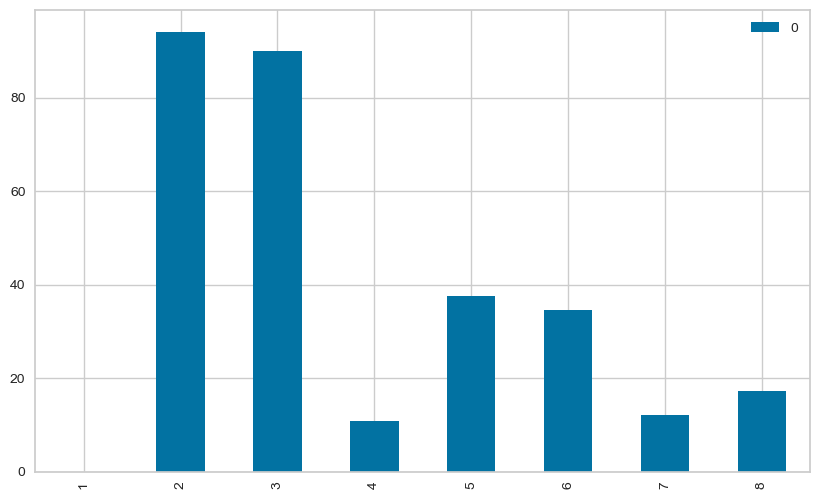

In [104]:
df_diff.plot(kind='bar');

## Yellowbrick (n_cluster selection)

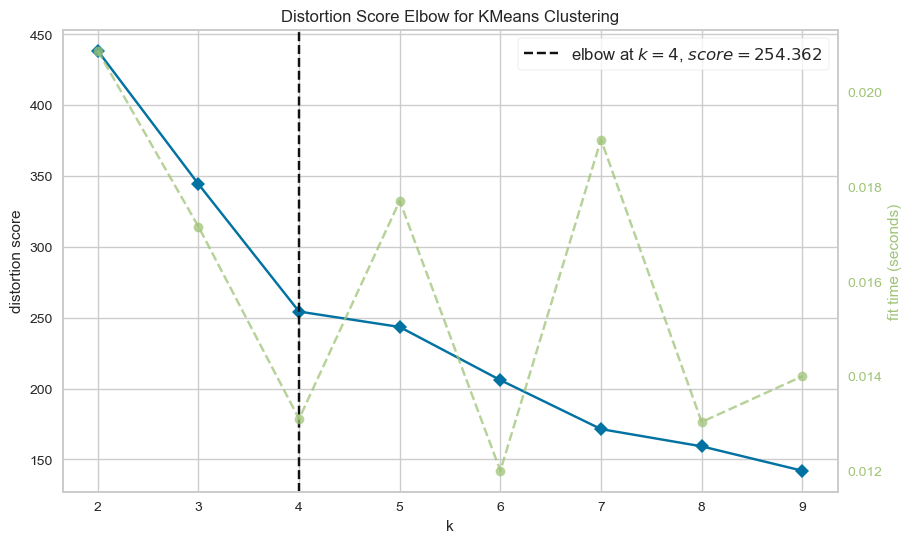

In [105]:
from yellowbrick.cluster import KElbowVisualizer 

model_ = KMeans(random_state=61)
visualizer = KElbowVisualizer(model_, k=(2,10)) 

visualizer.fit(X)       
visualizer.show();

## Silhouette analysis

In [106]:
from sklearn.metrics import silhouette_score

In [107]:
silhouette_score(X, K_means_model.labels_)

0.2991236610600728

In [108]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=61)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.30319765641607577
For n_clusters=3, the silhouette score is 0.3142800845203407
For n_clusters=4, the silhouette score is 0.350440614496942
For n_clusters=5, the silhouette score is 0.2991236610600728
For n_clusters=6, the silhouette score is 0.31296661375925994
For n_clusters=7, the silhouette score is 0.3315513749667554
For n_clusters=8, the silhouette score is 0.32628103196846275


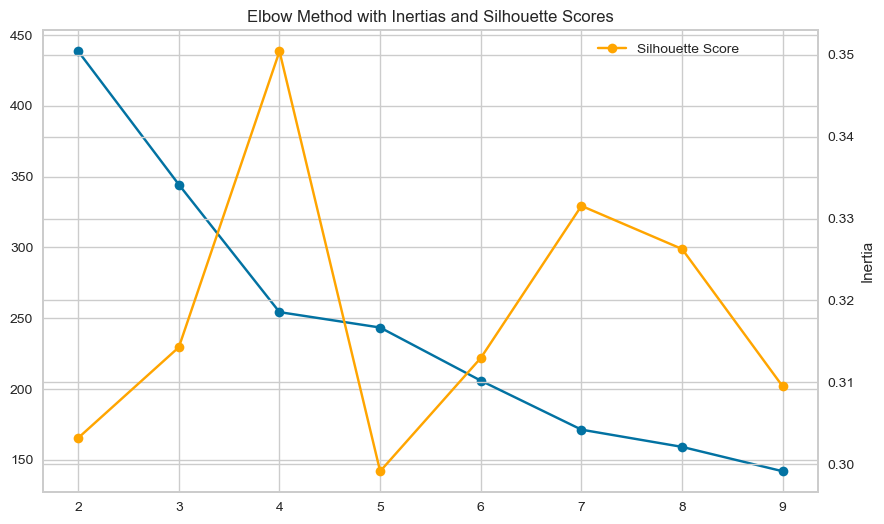

In [109]:
# Elbow ve Silhoutee skorunu bir arada gösteren grafik

inertia_scores = []
silhouette_scores = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=61)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    inertia = model.inertia_
    inertia_scores.append(inertia)
    silhouette_scores.append(silhouette)
# Plotting the Elbow Method with Inertias and Silhouette Scores
plt.figure(figsize=(10, 6))
# Plot Inertias
plt.plot(range(2,10), inertia_scores, label='Inertia', marker='o')
# Plot Silhouette Scores on a secondary y-axis
plt.twinx()
plt.plot(range(2,10), silhouette_scores, label='Silhouette Score', marker='o', color='orange')
# Add labels, title, and legend
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method with Inertias and Silhouette Scores')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1))
plt.show()

## Silhouette Visualizer

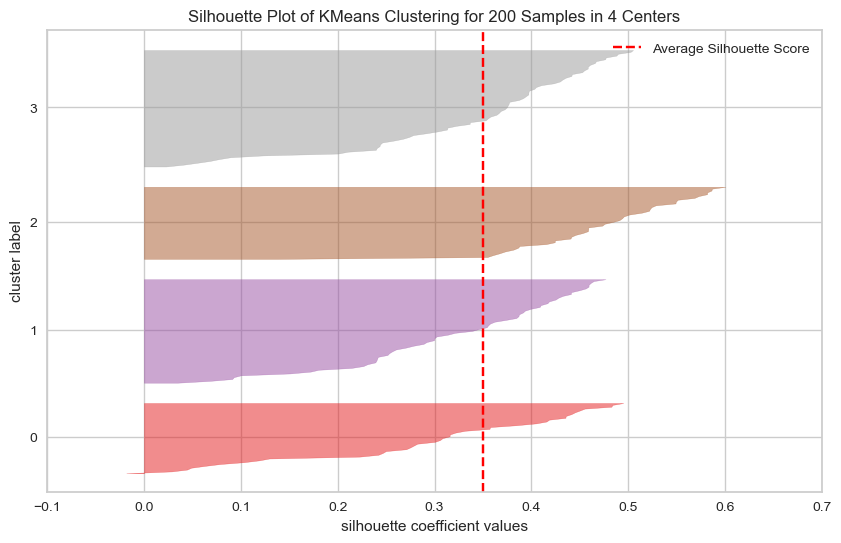

In [110]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=61)  # kmeans = 4 olarak seçtik ve ona göre çizim yaptı
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)   
visualizer.poof();

## Building the model based on the optimal number of clusters

In [111]:
model = KMeans(n_clusters =4, random_state=61)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [112]:
model.labels_ 

array([1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 0, 1, 1, 1, 3, 3, 3, 3, 1, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [113]:
clusters = model.labels_

In [114]:
X.head()

,gender,age,annual_income,spending_score
0,1,-1.425,-1.739,-0.435
1,1,-1.281,-1.739,1.196
2,0,-1.353,-1.701,-1.716
3,0,-1.138,-1.701,1.040
4,0,-0.563,-1.663,-0.396


In [115]:
X["predicted_clusters"] = clusters

In [116]:
X

,gender,age,annual_income,spending_score,predicted_clusters
0,1,-1.425,-1.739,-0.435,1
1,1,-1.281,-1.739,1.196,1
2,0,-1.353,-1.701,-1.716,1
3,0,-1.138,-1.701,1.040,1
4,0,-0.563,-1.663,-0.396,1
...,...,...,...,...,...
195,0,-0.276,2.269,1.118,2
196,0,0.441,2.498,-0.862,0
197,1,-0.492,2.498,0.924,2
198,1,-0.492,2.918,-1.250,0


# Hierachical Clustering

In [117]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [118]:
hc_ward = linkage (y= X, method ="ward") 
hc_complete = linkage (X, "complete") 
hc_average = linkage (X, "average")
hc_single= linkage(X ,"single")

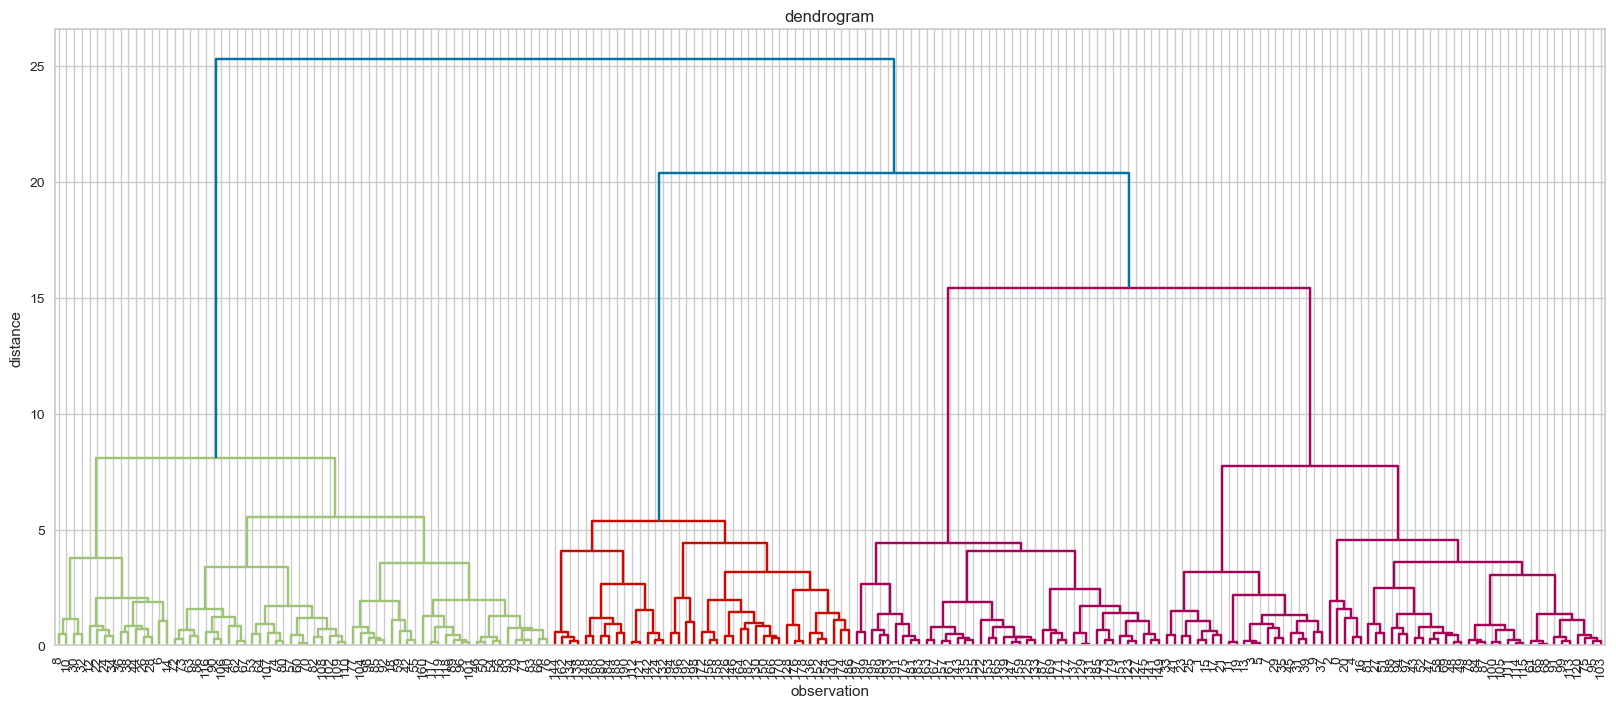

In [119]:
plt.figure(figsize= (20,8))
plt.title("dendrogram")
plt.xlabel("observation")
plt.ylabel("distance")
dendrogram (hc_ward, leaf_font_size=10);

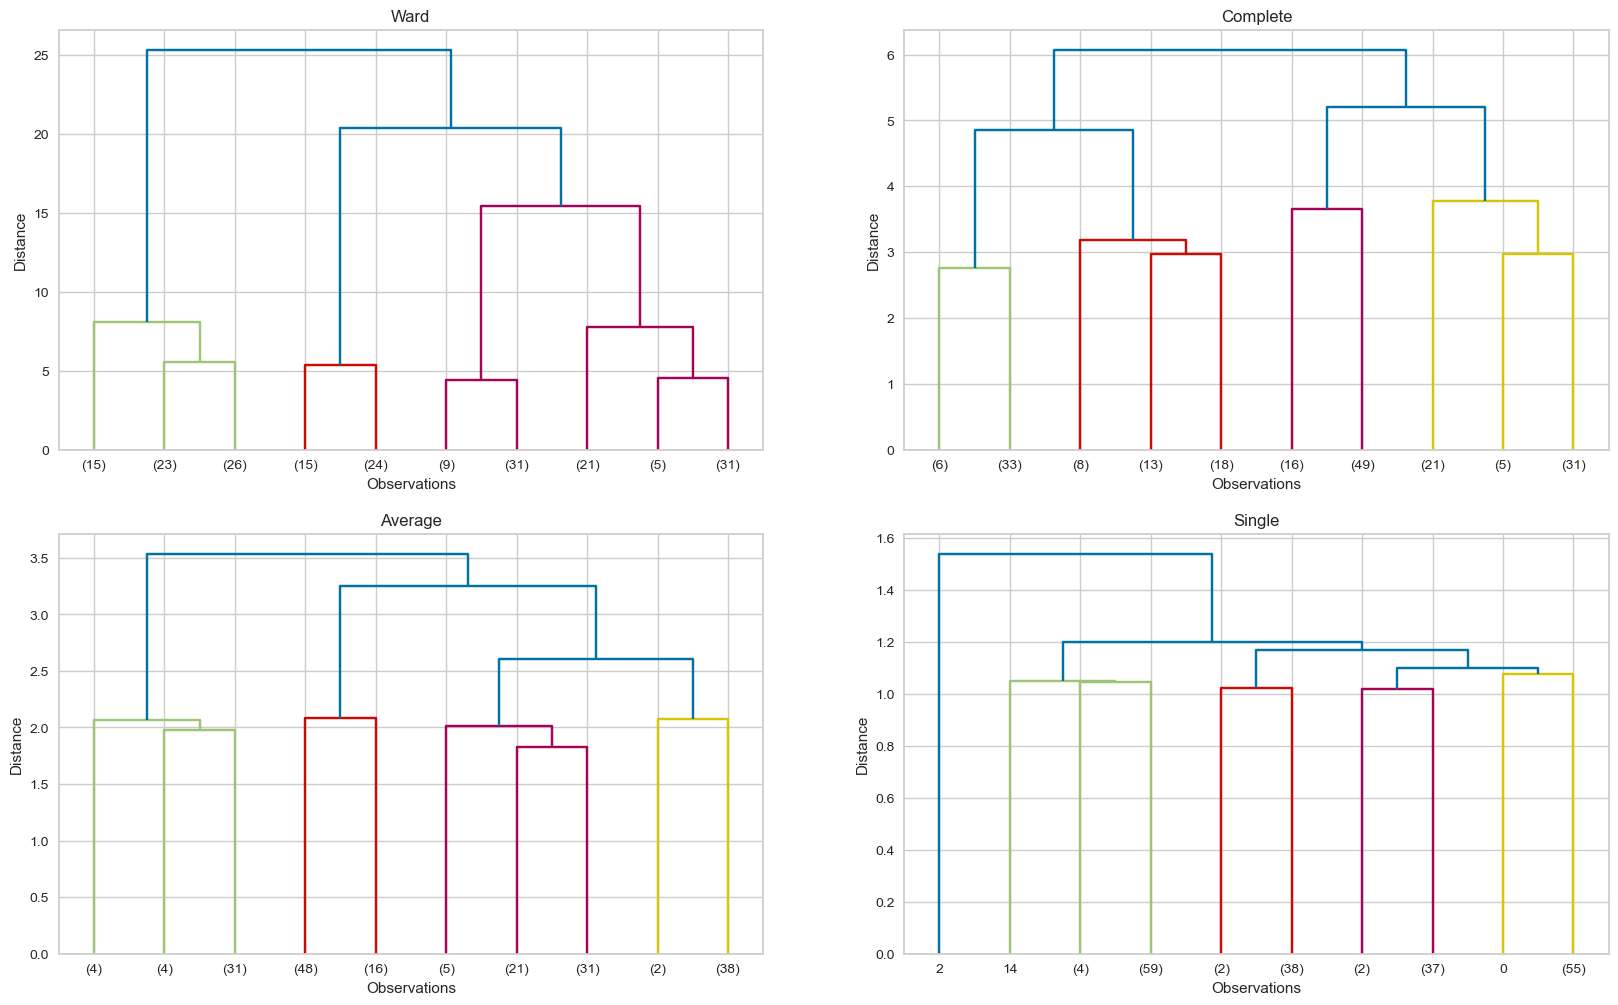

In [120]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);

## Hierarchical Clustering (Agglomerative)

In [121]:
from sklearn.cluster import AgglomerativeClustering

### Silhouette Score

In [122]:
from sklearn.metrics import silhouette_score

In [123]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.3608829485046555}
f'Silhouette Score for {3} clusters {0.4268932647122268}
f'Silhouette Score for {4} clusters {0.46204854317789973}
f'Silhouette Score for {5} clusters {0.43080777700961304}
f'Silhouette Score for {6} clusters {0.40162521619821334}
f'Silhouette Score for {7} clusters {0.3733455571096538}
f'Silhouette Score for {8} clusters {0.339967887553866}
f'Silhouette Score for {9} clusters {0.3419455772722846}


In [124]:
model = AgglomerativeClustering(n_clusters=4, linkage = "ward")
clusters = model.fit_predict(df)
df["cluster"] = clusters
df["cluster"] 

0      0
1      1
2      0
3      1
4      0
      ..
195    3
196    2
197    3
198    2
199    3
Name: cluster, Length: 200, dtype: int64

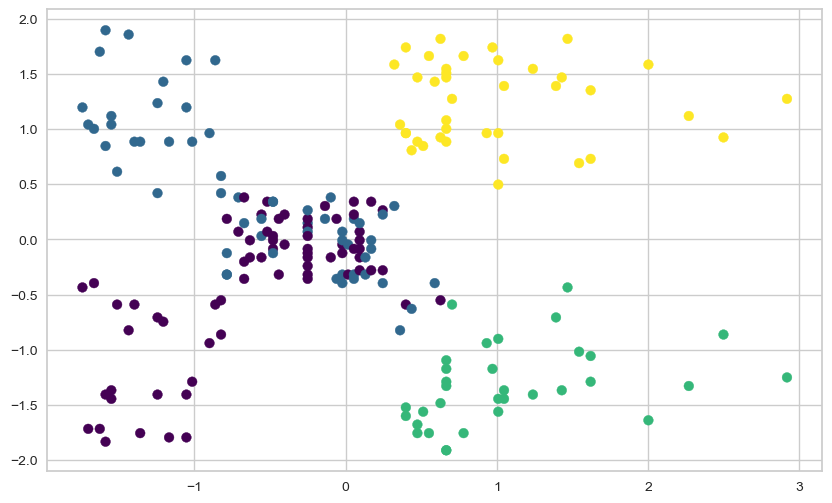

In [125]:
plt.scatter(df["annual_income"], df["spending_score"], c = clusters, cmap = "viridis");

In [126]:
clus_pred = df.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
gender,0.457,0.345,0.545,0.462
age,0.926,-0.927,0.187,-0.442
annual_income,-0.574,-0.593,1.089,0.992
spending_score,-0.400,0.401,-1.321,1.240


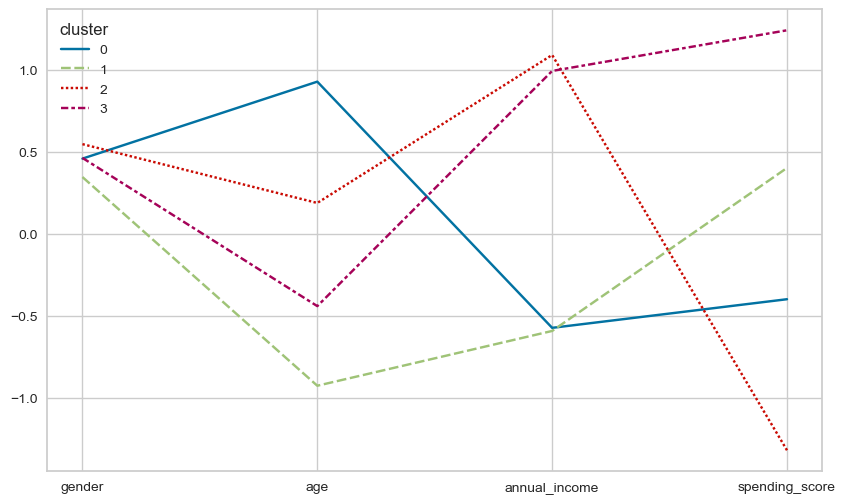

In [127]:
sns.lineplot(data = clus_pred); 

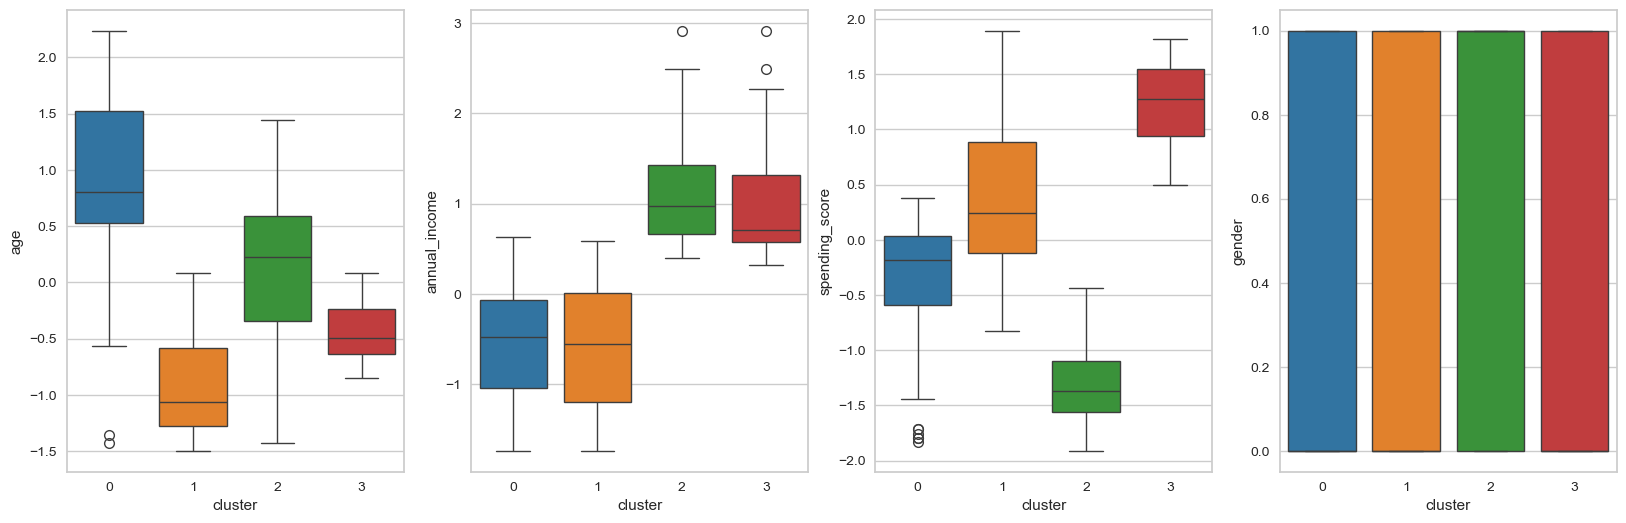

In [128]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "age", x = "cluster", data = df, palette='tab10')

plt.subplot(142)
sns.boxplot(y = "annual_income", x = "cluster", data = df, palette='tab10')

plt.subplot(143)
sns.boxplot(y = "spending_score", x = "cluster", data = df, palette='tab10')

plt.subplot(144)
sns.boxplot(y = "gender", x = "cluster", data = df, palette='tab10');

In [129]:
df2=df[["age","spending_score"]]
df2.head(2)

,age,spending_score
0,-1.425,-0.435
1,-1.281,1.196


In [130]:

K_means_model = KMeans(n_clusters=5, random_state=42)
K_means_model.fit_predict(df2)

array([2, 1, 4, 1, 2, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 4, 2, 3, 1, 4, 1,
       3, 1, 3, 1, 3, 2, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 0, 1, 3, 2,
       3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 4, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 4, 2, 2, 2, 0, 0, 0, 0, 2, 4, 2, 1, 4, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 4, 1, 3, 1, 4, 1, 3, 1, 2, 1, 4, 1, 3, 1, 4, 1, 3, 1, 3, 1,
       3, 1, 4, 1, 4, 1, 0, 1, 4, 1, 3, 1, 3, 1, 4, 2, 4, 1, 4, 1, 3, 1,
       3, 1, 3, 1, 4, 1, 3, 1, 4, 1, 3, 1, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1])